# Tidying Messy Datasets

Reference: [Tidy Data](https://vita.had.co.nz/papers/tidy-data.pdf), by Hadley Wickham

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

# 2. Defining tidy data

## 2.1. Data structure

Most statistical datasets are rectangular tables made up of **row**s and **column**s. The columns are almost always labelled and the rows are sometimes labelled. Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. The table has two columns and three rows, and both rows and columns are labelled.

(For details of the `Int64` data type, refer to [Nullable integer data type](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html#) of the pandas User Guide.)

In [3]:
table1 = pd.DataFrame(
    index=['John Smith', 'Jane Doe', 'Mary Johnson'],
    data={
        'treatment a': pd.array([None, 16, 3], dtype='Int64'),
        'treatment b': pd.array([   2, 11, 1], dtype='Int64'),
    },
)

In [4]:
table1

,treatment a,treatment b
John Smith,<NA>,2
Jane Doe,16,11
Mary Johnson,3,1


There are many ways to structure the same underlying data. Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different. Our vocabulary of rows and columns is simply not rich enough to describe why the two tables represent the same data. In addition to appearance, we need a way to describe the underlying semantics, or meaning, of the values displayed in table.

In [5]:
table2 = table1.T

In [6]:
table2

,John Smith,Jane Doe,Mary Johnson
treatment a,<NA>,16,3
treatment b,2,11,1


## 3.2. Data semantics

A dataset is a collection of **values**, usually either numbers (if quantitative) or strings (if qualitative). Values are organised in two ways. Every value belongs to a **variable** and an **observation**. A variable contains all values that measure the same underlying attribute (like height, temperature, duration) across units. An observation contains all values measured on the same unit (like a person, or a day, or a race) across attributes.

(The following steps show how the `table1` is reorganized to make the values, variables and observations more clear.)

In [7]:
table_temp = table1.reset_index()

In [8]:
table_temp

,index,treatment a,treatment b
0,John Smith,<NA>,2
1,Jane Doe,16,11
2,Mary Johnson,3,1


In [9]:
table_temp.columns=pd.Index(['person', 'a', 'b'])

In [10]:
table_temp

,person,a,b
0,John Smith,<NA>,2
1,Jane Doe,16,11
2,Mary Johnson,3,1


In [11]:
table3 = table_temp.melt(id_vars='person',
                         var_name='treatment', 
                         value_name='result')

In [12]:
table3

,person,treatment,result
0,John Smith,a,<NA>
1,Jane Doe,a,16
2,Mary Johnson,a,3
3,John Smith,b,2
4,Jane Doe,b,11
5,Mary Johnson,b,1


Table 3 reorganises Table 1 to make the values, variables and observations more clear. The dataset contains 18 values representing three variables and six observations. The variables
are:
1. `person`, with three possible values (John, Mary, and Jane).
2. `treatment`, with two possible values (a and b).
3. `result`, with five or six values depending on how you think of the missing value (`None`, 16, 3, 2, 11, 1).

# 3. Tidying messy datasets

## 3.1. Column headers are values, not variable names

A common type of messy dataset is tabular data designed for presentation, where **variables** form both the rows and columns, and column headers are **values**, not variable names.

(For example, suppose that a particular study is interested in characteristics such as age, gender, marital status, and annual income for a sample of 100 individuals. These characteristics would be called the **variables** of the study, and data values for each of the variables would be associated with each individual. Thus, the data **values** of 28, male, single, and `$30,000` would be recorded for a 28-year-old single male with an annual income of `$30,000`. With 100 individuals and 4 variables, the data set would have `100 × 4 = 400` items. [[Statistics, Britannica Kids](https://www.britannica.com/science/statistics)])

In [13]:
ir = pd.DataFrame(
    columns = ['00~10k', '10~20k', '20~30k', '30~40k'],
    index = ['Agnostic', 'Atheist', 'Buddhist'],
    data = pd.array([
        [ 27, 34, 60, 81 ],
        [ 12, 27, 37, 52 ],
        [ 27, 21, 30, 34 ]
    ])
)

This dataset has three variables: `religion`, `income` and `frequency`.

In [14]:
ir

,00~10k,10~20k,20~30k,30~40k
Agnostic,27,34,60,81
Atheist,12,27,37,52
Buddhist,27,21,30,34


(Notice that the following tabular representation of the dataset does not show the names of two variables, `income` and `frequency`. That is the drawback of *messy data*.)

(For later use, the list of strings representing the income class is stored in a Python variable `income_class`.

In [15]:
income_class = ir.columns.to_list()

In [16]:
income_class

['00~10k', '10~20k', '20~30k', '30~40k']

### Tidying messy dataframes

To tidy it, we need to **melt**, or stack it. In other words, we need to turn columns into rows.

Melting is parameterized by a list of columns that are already variables, or **identifier variable**s. The above dataset has one identifier variable, `religion`.

In [17]:
ir.rename_axis('religion').reset_index().head()

,religion,00~10k,10~20k,20~30k,30~40k
0,Agnostic,27,34,60,81
1,Atheist,12,27,37,52
2,Buddhist,27,21,30,34


The other columns are converted into two variables:
- a new variable called `variable` that contains repeated column headings and
- a new variable called `value` that contains the concatenated data values from the previously separate columns.

In [18]:
ir.rename_axis('religion').reset_index().melt(
    id_vars = 'religion',
).head()

,religion,variable,value
0,Agnostic,00~10k,27
1,Atheist,00~10k,12
2,Buddhist,00~10k,27
3,Agnostic,10~20k,34
4,Atheist,10~20k,27


To better reflect their roles in this dataset, the variable column has been renamed to `income`, and the value column to `freq`.

In [19]:
tidy_ir = ir.rename_axis('religion').reset_index().melt(
    id_vars='religion', 
    value_vars=income_class,
    var_name='income',
    value_name='freq',
)

In [20]:
tidy_ir

,religion,income,freq
0,Agnostic,00~10k,27
1,Atheist,00~10k,12
2,Buddhist,00~10k,27
3,Agnostic,10~20k,34
4,Atheist,10~20k,27
5,Buddhist,10~20k,21
6,Agnostic,20~30k,60
7,Atheist,20~30k,37
8,Buddhist,20~30k,30
9,Agnostic,30~40k,81


This form is tidy because each column represents a variable and each row represents an observation, in this case a demographic unit corresponding to a combination of religion and income.

### Presenting tidy dataframes

In [21]:
import seaborn as sns

In [22]:
sns.set_theme(style='darkgrid')

Now that you have the tidy data, you have two options for presentation: grouped by `religion` or by `income`.

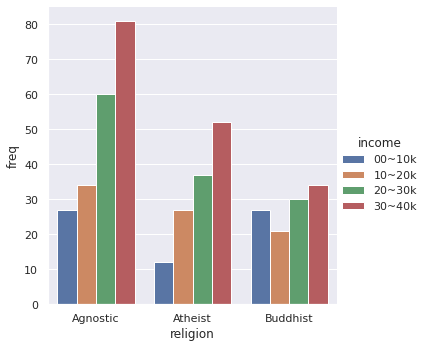

In [23]:
sns.catplot(
    data=tidy_ir, kind='bar', y='freq', x='religion', hue='income')

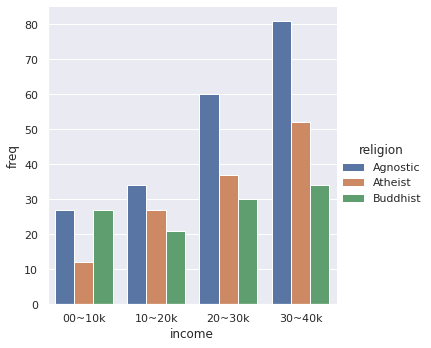

In [24]:
sns.catplot(
    data=tidy_ir, kind='bar', y='freq', x='income', hue='religion')

To reshape the dataframe for presentation, we use the `DataFrame.pivot()` method.

In [25]:
pivot_ir1 = tidy_ir.pivot(index='religion', columns='income', values='freq')

In [26]:
pivot_ir1.index.rename(None, inplace=True)

In [27]:
pivot_ir1.columns.rename(None, inplace=True)

In [28]:
pivot_ir1

,00~10k,10~20k,20~30k,30~40k
Agnostic,27,34,60,81
Atheist,12,27,37,52
Buddhist,27,21,30,34


In [29]:
pivot_ir2 = tidy_ir.pivot(index='income', columns='religion', values='freq')

In [30]:
pivot_ir2.index.rename(None, inplace=True)

In [31]:
pivot_ir2.columns.rename(None, inplace=True)

In [32]:
pivot_ir2

,Agnostic,Atheist,Buddhist
00~10k,27,12,27
10~20k,34,27,21
20~30k,60,37,30
30~40k,81,52,34


## 3.2. Multiple variables stored in one column

After melting, the column variable names often becomes a combination of multiple underlying variable names. This is illustrated by the tuberculosis (TB) dataset, a sample of which is shown in Table 9. This dataset comes from the World Health Organisation, and records the counts of confirmed tuberculosis cases by country, year, and demographic group. The demographic groups are broken down by sex (m, f) and age (0–14, 15–25, 25–34, 35–44, 45–54, 55–64, unknown).

In [33]:
tb = pd.DataFrame(data={
    'country': [ 'AD','AE','AF','AG','AL','AM','AN','AO','AR','AS' ],
    'year':  [ 2000 for _ in range(10) ],
    'm014':  pd.array([ 0, 2,  52, 0,  2,   2, 0,  186,  97, None ], dtype="Int64"),
    'm1524': pd.array([ 0, 4, 228, 0, 19, 152, 0,  999, 278, None ], dtype="Int64"),
    'm2534': pd.array([ 1, 4, 183, 0, 21, 130, 1, 1003, 594, None ], dtype="Int64"),
    'm3544': pd.array([ 0, 6, 149, 0, 14, 131, 2,  912, 402, None ], dtype="Int64"),
    'm4554': pd.array([ 0, 5, 129, 0, 24,  63, 0,  482, 419,    1 ], dtype="Int64"),
    'm5564': pd.array([ 0, 12, 94, 0, 19,  26, 0,  312, 368,    1 ], dtype="Int64"),
    'm65':   pd.array([ 0, 10, 80, 1, 16,  21, 0,  194, 330, None ], dtype="Int64"),
    'mu':    pd.array([ None for _ in range(10) ], dtype="Int64"),
    'f014':  pd.array([ None, 3, 93, 1, 3, 1, 0, 247, 121, None ], dtype="Int64"),
})

In [34]:
tb

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0,0,1,0,0,0,0,<NA>,<NA>
1,AE,2000,2,4,4,6,5,12,10,<NA>,3
2,AF,2000,52,228,183,149,129,94,80,<NA>,93
3,AG,2000,0,0,0,0,0,0,1,<NA>,1
4,AL,2000,2,19,21,14,24,19,16,<NA>,3
5,AM,2000,2,152,130,131,63,26,21,<NA>,1
6,AN,2000,0,0,1,2,0,0,0,<NA>,0
7,AO,2000,186,999,1003,912,482,312,194,<NA>,247
8,AR,2000,97,278,594,402,419,368,330,<NA>,121
9,AS,2000,<NA>,<NA>,<NA>,<NA>,1,1,<NA>,<NA>,<NA>


Table 9: Original TB dataset. Corresponding to each ‘m’ column for males, there is also an ‘f’ column for females, `f1524`, `f2534` and so on. These are not shown to conserve space. Note the mixture of 0s and missing values (`<NA>`). This is due to the data collection process and the distinction is important for this dataset.

In [35]:
tb.melt(id_vars=['country', 'year'], value_name='cases')

,country,year,variable,cases
0,AD,2000,m014,0
1,AE,2000,m014,2
2,AF,2000,m014,52
3,AG,2000,m014,0
4,AL,2000,m014,2
...,...,...,...,...
85,AM,2000,f014,1
86,AN,2000,f014,0
87,AO,2000,f014,247
88,AR,2000,f014,121
